In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

In [2]:
# random_txt_files = np.array(glob.glob('../data/RandomTesting/*.txt'))
only_s_txt_files = np.array(glob.glob('../data/TargettedTesting/OnlyI*.txt'))
hi_i_h_txt_files = np.array(glob.glob('../data/TargettedTesting/HI-I-H*.txt'))

# print(len(random_txt_files))
print(len(only_s_txt_files))
print(len(hi_i_h_txt_files))

7009
0


In [3]:
def split_begin_rate(files,choice):
    
    begin_at_1 = []
    begin_at_10= []
    
    for file in files:
        if file.split("_")[3] == "1":
            begin_at_1.append(file)
        elif file.split("_")[3] == "10":
            begin_at_10.append(file)
        
    if(choice==1):
        return begin_at_1
    elif(choice==10):
        return begin_at_10
    else:
        print("Invalid choice")

In [4]:
def split_daily_rate(files,choice):
    
    point_one = []
    point_five= []
    
    for file in files:
        if file.split("_")[5] == "0.1":
            point_one.append(file)
        elif file.split("_")[5] == "0.5":
            point_five.append(file)
            
    if(choice==0.1):
        return point_one
    elif(choice==0.5):
        return point_five
    else:
        print("Invalid choice")

In [5]:
def plot_graph(all_files,cc,choice):
#     print(all_files[0])
    if cc[0] == 0:
        if(cc[2] == 0):
            clrs = plt.cm.Blues(np.linspace(0.5,1,6))
        elif(cc[2] == 1):
            clrs = plt.cm.Greens(np.linspace(0.5,1,6))
    elif cc[0] == 1:
        if(cc[2] == 0):
            clrs = plt.cm.Reds(np.linspace(0.5,1,6))
        elif(cc[2] == 1):
            clrs = plt.cm.Oranges(np.linspace(0.5,1,6))
    
    
#     cases = ["0.1%: Retesting Symtomatics, Not testing HCW", "0.1%: Not Retesting symptomatics, Not testing HCW", "0.1%: Testing HCW after Symptomatics", "1%: Testing HCW after Symptomatic"]
    cases = ["Only Testing Symptomatics", "HCW-I-HCW Testing"]
    case_color = ["darkgoldenrod", "darkgreen", "firebrick"]
    
    p_0_0 = []
    p_0_1 = []
    p_0_2 = []
    p_0_3 = []
    p_0_4 = []
    p_0_5 = []
    p_0_6 = []
    p_0_7 = []
    p_0_8 = []
    p_0_9 = []
    p_1_0 = []

    p = [p_0_0, p_0_1, p_0_2, p_0_3, p_0_4, p_0_5, p_0_6, p_0_7, p_0_8, p_0_9, p_1_0]
    x_axis = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


    for i in range(0,len(all_files)):
        for j in range(0,len(x_axis)):
            if(all_files[i].split("_")[8]==str(x_axis[j])):
                p[j].append(all_files[i])
    
    data = [[],[],[],[],[],[],[],[],[],[],[]]
    
    cools = ['navy', 'royalblue', 'blue','green','lime','magenta','olive','orange','orangered','maroon','red']

    n_pop = 10000
    
    print("*** Data ***")
    
    for i in range(0,len(data)):
        count = 0
        temp_av = np.zeros(120,float)
        for j in range(0, len(p[i])):
            temp_data = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][4] # Get number of recovered from data
            temp_data += np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][5] # DOING THIS BECAUSE I ONLY PLOTTED TILL 100 days, but infection completely dies out later
            
            all_inf = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,5]
            tx = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,0]
#             plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=cools[i])
            if(len(temp_av)<len(all_inf)):
                for k in range(0,len(temp_av)):
                    temp_av[k] += all_inf[k]
            else:
                temp_av += all_inf
            count += 1
            data[i].append(temp_data)
#         print("RAT "+str(x_axis[i]*100)+"% "+str(data[i])+" "+ str(len(data[i]))+" runs")
#         plt.yscale('log')
#         print(count,end=" ")
#         tx = np.linspace(0,120,120)
#         temp_av = temp_av/(n_pop*count)
#         plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[6])+"% RAT frac:"+str(round(x_axis[i]*100))+"%")
#         plt.ylabel("Normalised Fraction of Infected")
#         plt.xlabel("Time (Days)")
#         plt.legend()
# #         plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
#         plt.show()


    avgs = np.zeros(len(p),float)
    stds = np.zeros(len(p),float)

    

    for i in range(0,len(avgs)):
        if(len(data[i])>0):
            avgs[i] = np.average(data[i])/n_pop
            stds[i] = np.std(data[i])/n_pop
        else:
            avgs[i] = np.nan
            stds[i] = np.nan
    
    if(len(all_files)!=0):
        plt.title("Begin Testing at - "+all_files[0].split("_")[3]+"% infected. Daily Test Rate: "+all_files[0].split("_")[5]+"%")
    
        plt.xlabel("Percentage of total tests that are RAT (%)")
        plt.ylabel("Normalised Asymptotic Fraction Infected")
        #plt.locator_params(nbins = len(labels),axis='x')
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    #     plt.plot(x_axis*100, avgs,'-o',color=clrs[0],label=all_files[0].split("_")[2]+"% "+ all_files[i].split("_")[0].split("/")[-1]+" Testing Daily")
        plt.plot(x_axis*100, avgs,'-o',color=case_color[choice],label=cases[choice],alpha=1)#0.7*cc[1])
        plt.errorbar(x_axis*100,avgs,yerr=stds,ls='none',color=case_color[choice],solid_capstyle='projecting', capsize=5,alpha=0.5)
    #     plt.legend()
    #     plt.savefig("../images/Comparing_Sensitivities/"+all_files[i].split("_")[0].split("/")[-1]+"_"+all_files[i].split("_")[1]+all_files[i].split("_")[2]+"_BETA06_.png",dpi=500,facecolor='w')
    #     plt.show()


In [6]:
def plot_i_graph(all_files,cc,choice):
#     print(all_files[0])
#     if cc[0] == 0:
#         if(cc[2] == 0):
#             clrs = plt.cm.Blues(np.linspace(0.5,1,6))
#         elif(cc[2] == 1):
#             clrs = plt.cm.Greens(np.linspace(0.5,1,6))
#     elif cc[0] == 1:
#         if(cc[2] == 0):
#             clrs = plt.cm.Reds(np.linspace(0.5,1,6))
#         elif(cc[2] == 1):
#             clrs = plt.cm.Oranges(np.linspace(0.5,1,6))
    
    
#     cases = ["0.1%: Retesting Symtomatics, Not testing HCW", "0.1%: Not Retesting symptomatics, Not testing HCW", "0.1%: Testing HCW after Symptomatics", "1%: Testing HCW after Symptomatic"]
    cases = ["Only Testing Symptomatics", "HCW-I-HCW Testing"]
    case_color = ["darkgoldenrod", "darkgreen", "firebrick"]
    
    p_0_0 = []
    p_0_1 = []
    p_0_2 = []
    p_0_3 = []
    p_0_4 = []
    p_0_5 = []
    p_0_6 = []
    p_0_7 = []
    p_0_8 = []
    p_0_9 = []
    p_1_0 = []

    p = [p_0_0, p_0_1, p_0_2, p_0_3, p_0_4, p_0_5, p_0_6, p_0_7, p_0_8, p_0_9, p_1_0]
    x_axis = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


    for i in range(0,len(all_files)):
        for j in range(0,len(x_axis)):
            if(all_files[i].split("_")[8]==str(x_axis[j])):
                p[j].append(all_files[i])
    
    data = [[],[],[],[],[],[],[],[],[],[],[]]
    
    cools = ['navy', 'royalblue', 'blue','green','lime','magenta','olive','orange','orangered','maroon','red']

    n_pop = 10000
    
    print("*** Data ***")
    
#     for i in range(0,len(data)):
    i=cc
    count = 0
    temp_av = np.zeros(120,float)
    for j in range(0, len(p[i])):
        temp_data = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][4] # Get number of recovered from data
        temp_data += np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][5] # DOING THIS BECAUSE I ONLY PLOTTED TILL 100 days, but infection completely dies out later

        all_inf = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,5]
        tx = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,0]
        plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=case_color[choice])
      
        if(len(temp_av)<len(all_inf)):
            for k in range(0,len(temp_av)):
                temp_av[k] += all_inf[k]
        else:
            temp_av += all_inf
        count += 1
        data[i].append(temp_data)
#         print("RAT "+str(x_axis[i]*100)+"% "+str(data[i])+" "+ str(len(data[i]))+" runs")
#         plt.yscale('log')
    print(count,end=" ")
    tx = np.linspace(0,120,120)
    temp_av = temp_av/(n_pop*count)
    if(len(all_files)>0):
        plt.title("Begin Testing at - "+all_files[0].split("_")[3]+"% infected. Daily Test Rate: "+all_files[0].split("_")[5]+"%\nRAT Fraction:"+p[i][0].split("_")[8])
#     plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[6])+"% RAT frac:"+str(round(x_axis[i]*100))+"%")
    plt.plot(tx,temp_av,color=case_color[choice],label=cases[choice],linewidth=3)
    plt.ylabel("Normalised Fraction of Infected")
    plt.xlabel("Time (Days)")
#     plt.legend()
#         plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
#     plt.show()

*** Data ***
*** Data ***


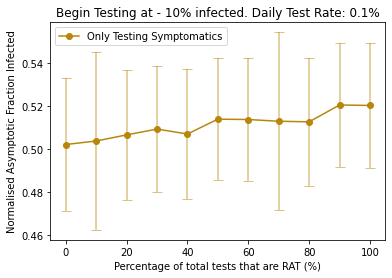

*** Data ***
*** Data ***


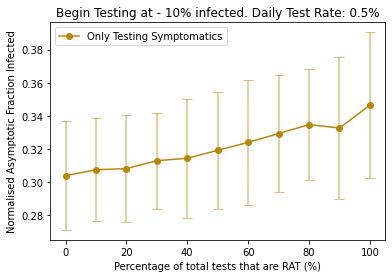

In [12]:
dtrs = [0.1,0.5]
begin= [10]
file_list = [only_s_txt_files, hi_i_h_txt_files]

for begin_at in begin:
    for dtr in dtrs:
        for i in range (0,len(file_list)):
            file = file_list[i]
            plot_graph(split_daily_rate(split_begin_rate(file , begin_at),dtr),[1,1,1],i)
        plt.legend()
        plt.show()

*** Data ***
0 *** Data ***
0 

<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)
<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)


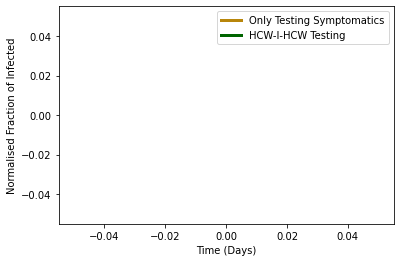

*** Data ***
318 *** Data ***
0 

<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)


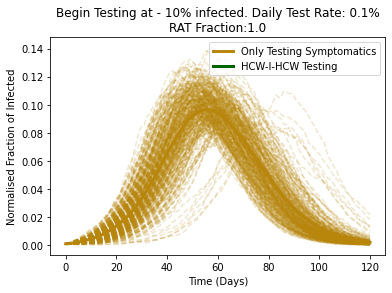

*** Data ***
0 *** Data ***
0 

<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)
<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)


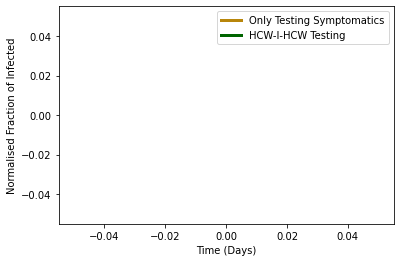

*** Data ***
318 *** Data ***
0 

<ipython-input-6-ba3c7ddc8a89>:71: RuntimeWarning: invalid value encountered in true_divide
  temp_av = temp_av/(n_pop*count)


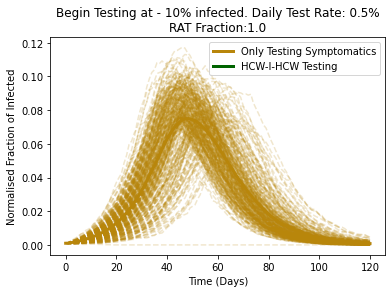

In [8]:
dtrs = [0.1,0.5]
begin= [10]
file_list = [only_s_txt_files, hi_i_h_txt_files]

for dtr in dtrs:
    for begin_at in begin:
        for i in range (0,len(file_list)):
            file = file_list[i]
            plot_i_graph(split_daily_rate(split_begin_rate(file , begin_at),dtr),10,i)
        
        plt.legend()
        plt.show()

In [9]:
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)




def plot_scatter(all_files, choice):
    
    cases = ["Only Testing Symptomatics", "HCW-I-HCW Testing"]
    case_color = [["darkgoldenrod", "dodgerblue"],
                  ["firebrick", "navy"]]
    
    
    p_0_0 = []
    p_1_0 = []

    p = [p_0_0, p_1_0]
    x_axis = np.array([0.0, 1.0])

    for i in range(0,len(all_files)):
        for j in range(0,len(x_axis)):
            if(all_files[i].split("_")[8]==str(x_axis[j])):
                p[j].append(all_files[i])
    
    
#     print("*** Data ***")
    
    n_pop = 10000
    l = ["Pure PCR", "Pure RAT"]
    for i in range(0, len(p)):
        
        count = 0
        rec_list = []
        peak_list= []
        
        for j in range(0,len(p[i])):
            
            file = np.genfromtxt(p[i][j],delimiter=" ", comments="#")
            
            all_inf = (file[:,2]+file[:,3]+file[:,5])/n_pop
            
            if(file[-1][4]>100):
                n_rec = file[-1][4]/n_pop
                rec_list.append(n_rec)

                peak_inf = max(all_inf)
                peak_list.append(peak_inf)
            
            plt.scatter(n_rec,peak_inf,color=case_color[i][choice],alpha=0.2)
            plt.xlabel("Asymptotic Fraction of Recovered")
            plt.ylabel("Peak Infected Fraction")
    
    
        avg_rec = np.average(rec_list)
        std_rec = np.std(rec_list)

        avg_peak= np.average(peak_list)
        std_peak= np.std(peak_list)
        
        print("Fraction of Recovered for",x_axis[i]*100,"% RAT, with Daily Testing of",p[i][j].split("_")[5],"% :",avg_rec,r"$\pm$",std_rec,"Color=",case_color[i][choice])
        print("Peak Infected Fraction   ",x_axis[i]*100,"% RAT, with Daily Testing of",p[i][j].split("_")[5],"% :",avg_peak,r"$\pm$",std_peak,"Color=",case_color[i][choice])
        
#         plt.scatter(avg_rec,avg_peak,s=10000*max(std_rec,std_peak),color=case_color[i][choice],alpha=0.7,label=cases[i])
        plt.scatter(avg_rec,avg_peak, marker='o', edgecolor='w', color=case_color[i][choice],s=100)
        
        cov = np.cov(rec_list, peak_list)
        e = get_cov_ellipse(cov, (avg_rec, avg_peak), 3, fc=case_color[i][choice], alpha=0.2,label=l[i])
        plt.gca().add_patch(e)
        
#         plt.vlines( avg_rec ,0,avg_peak,color=case_color[i][choice])
        

In [10]:
only_s_txt_files[0].split("_")

['../data/TargettedTesting/OnlyI-Targetted',
 'Testing',
 'BeginAt',
 '10',
 'DTR',
 '0.5',
 'RAT',
 '0.95',
 '0.6',
 'PCR',
 '1.0',
 '0.4',
 '201011091723729190.txt']

OnlyI-Targetted
Fraction of Recovered for 0.0 % RAT, with Daily Testing of 0.1 % : 0.5003453125 $\pm$ 0.03127661831188506 Color= darkgoldenrod
Peak Infected Fraction    0.0 % RAT, with Daily Testing of 0.1 % : 0.10181999999999998 $\pm$ 0.012005099437322458 Color= darkgoldenrod
Fraction of Recovered for 100.0 % RAT, with Daily Testing of 0.1 % : 0.5182518867924528 $\pm$ 0.02947419689497131 Color= firebrick
Peak Infected Fraction    100.0 % RAT, with Daily Testing of 0.1 % : 0.10452955974842768 $\pm$ 0.011778824158137217 Color= firebrick


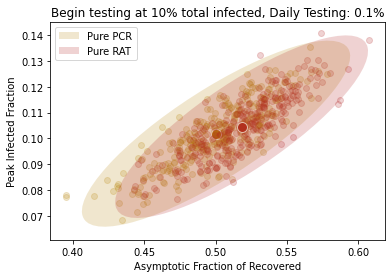

OnlyI-Targetted
Fraction of Recovered for 0.0 % RAT, with Daily Testing of 0.5 % : 0.304518125 $\pm$ 0.02812005594739056 Color= darkgoldenrod
Peak Infected Fraction    0.0 % RAT, with Daily Testing of 0.5 % : 0.0817309375 $\pm$ 0.009557494395556492 Color= darkgoldenrod
Fraction of Recovered for 100.0 % RAT, with Daily Testing of 0.5 % : 0.34682492113564667 $\pm$ 0.03949210331652222 Color= firebrick
Peak Infected Fraction    100.0 % RAT, with Daily Testing of 0.5 % : 0.08510378548895899 $\pm$ 0.010833051344978663 Color= firebrick


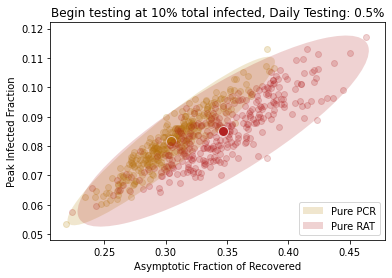

In [14]:
dtrs = [0.1,0.5]
begin= [10]
file_list = [only_s_txt_files]

for begin_at in begin:
    for dtr in dtrs:
        for i in range (0,len(file_list)):
            plt.title("Begin testing at "+str(begin_at)+"% total infected, Daily Testing: "+str(dtr)+"%")
            file = file_list[i]
            print(file[0].split("_")[0].split("/")[-1])
            plot_scatter(split_daily_rate(split_begin_rate(file , begin_at),dtr),i)
        
            plt.legend()
            plt.show()

In [ ]:
no_test = np.array(glob.glob('../data/RandomTesting/Full Run (4th October)/Random_Testing_0_*.txt'))

plot_scatter(no_test,0)